In [1]:
import numpy as np
import matplotlib.pyplot as plt


Crear el DataSet







[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


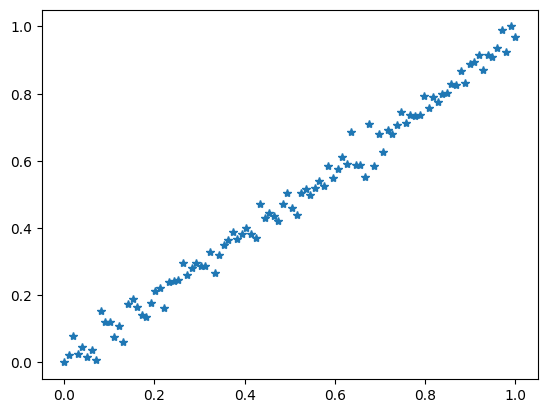

In [15]:
def Create_DateSet(num_items):
  x =  [i for i in range(1,num_items + 1 ) ]
  y  = x +  np.random.normal(0, 2.9, num_items)
  return x,y

x_train,y_train = Create_DateSet(100)
x_test,y_test   = Create_DateSet(10)

print(x_train)

# Primer paso normalizar los datos
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = (x_train - min(x_train))/(max(x_train) - min(x_train))
y_train = (y_train - min(y_train))/(max(y_train) - min(y_train))


x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = (x_test - min(x_test))/(max(x_test) - min(x_test))
y_test = (y_test - min(y_test))/(max(y_test) - min(y_test))



plt.plot(x_train,y_train,'*')



In [16]:
def createDatasetMultivariable(num_items):
  x = np.random.rand(num_items,2)
  y = np.sum(x,axis=1)
  return x,y

x_train,y_train = createDatasetMultivariable(5)
print(x_train)

[[0.54019659 0.66727952]
 [0.37025045 0.10435068]
 [0.51212681 0.89210549]
 [0.12279211 0.27859095]
 [0.63386144 0.59267275]]


# Modelo
$h(x_i) = x_i*w + b$

In [4]:
def h(x,w,b):
  return np.dot(x,w) + b
 # write your code here

# test
print(h([1,2,3],2,2))

[4 6 8]


# Loss function
$Loss =\frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2$

In [ ]:
def Error(y,x,w,b):
   y_aprox = h(x,w,b)
   s = 0
   for i in range(len(y)):
      s = s  + (y[i] - y_aprox[i])**2
   return  s/(2*len(y))
  # write your code here

print(Error([1,2,3],[1,2,3],1,0))



0.0


$db = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-1)$

$dw = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-x_i)$

In [13]:
def derivada(x,y,w,b):
  sum1 = 0
  sum2 = 0

  for i in range(len(y)):
    sum1 += (y[i] -h(x[i], w, b)) * (-1)
    sum2 += (y[i] -h(x[i], w, b)) * (-x[i])

  db = sum1/len(y)
  dw = sum2/len(y)
  return db,dw

print(derivada([1,2,3],[1,2,3],1,0))

(0.0, 0.0)


$w = w - alfa*dw$

$b = b - alfa*db$



In [ ]:
def update(w,b, alpha,db,dw):
  db =   b  - alpha*db
  dw =   w  - alpha*dw
  return db,dw
  # write your code here

In [ ]:
def train(x,y,umbral, alfa):
  w = np.random.rand()
  b = np.random.rand()

  L = Error(x,y,w,b)
  i=0

  while(L > umbral):
    db, dw = derivada(x,y,w,b)
    b,w = update(w,b,alfa,db,dw)
    L = Error(x,y,w,b)
    if(i%10==0):
      plt.plot(x,[h(xi,w,b) for xi in x])
      print(L)
    i=i+1
  plt.plot(x,[h(xi,w,b) for xi in x])
  return b,w



0.011687164148547115
0.0036651672712396926
0.002307035182205322
0.001621301710918856
0.001261087345305542
0.0010637885503953616
Error de 0.1390273762874482


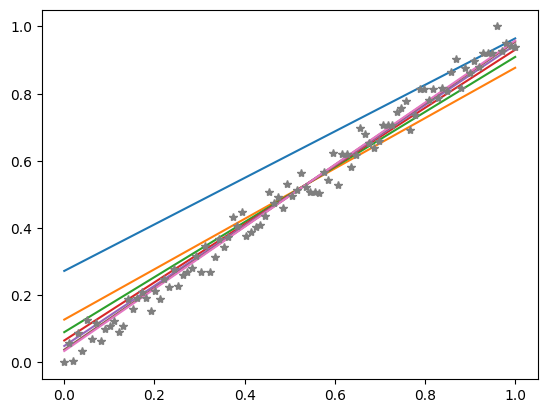

In [ ]:
## entrenando el modelo
b,w = train(x_train,y_train,0.001, 0.6)
plt.plot(x_train,y_train,'*')
## prediccion
print("Error de " + str(Error(y_test, x_train , b,w)))




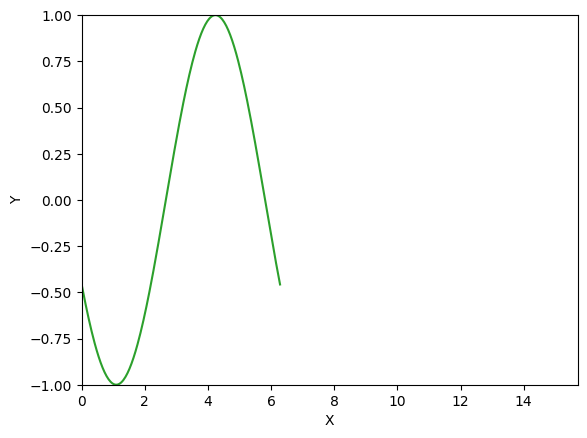

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Configura el backend de matplotlib para que funcione en Google Colab
%matplotlib inline

fig, ax = plt.subplots()

# Define la función de inicialización
def init():
    ax.set_xlim(0, 5*np.pi)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    global line
    line, = ax.plot([], [])
    return (line,)

# Define la función de actualización de la animación
t = np.linspace(0, 2*np.pi, 200)

def update(frame):
    y = np.sin(t + frame/10)
    line.set_data(t, y)
    return (line,)

# Crea la animación
ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True, interval=20)

# Muestra la animación en la notebook
HTML(ani.to_jshtml())


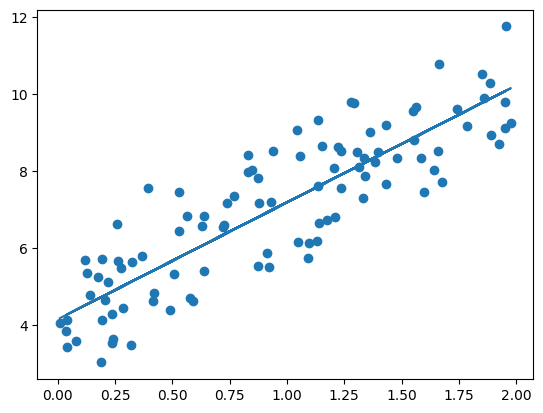

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Define cost function and its gradient
def mse(theta, X, y):
    m = len(y)
    y_pred = X.dot(theta)
    return 1/(2*m) * np.sum((y_pred - y)**2)

def mse_gradient(theta, X, y):
    m = len(y)
    y_pred = X.dot(theta)
    return 1/m * X.T.dot(y_pred - y)

# Define gradient descent function
def gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    theta = np.random.randn(2,1)  # random initialization
    theta_history = [theta]
    cost_history = [mse(theta, X, y)]
    for i in range(n_iterations):
        gradient = mse_gradient(theta, X, y)
        theta = theta - learning_rate * gradient
        theta_history.append(theta)
        cost_history.append(mse(theta, X, y))
    return theta_history, cost_history

# Run gradient descent
theta_history, cost_history = gradient_descent(X_b, y)

# Plot the data and regression line
fig, ax = plt.subplots()
ax.scatter(X, y)
line, = ax.plot([], [])

# Define animation function
def animate(i):
    theta = theta_history[i]
    line.set_data(X, X_b.dot(theta))
    return (line,)

# Run the animation
ani = FuncAnimation(fig, animate, frames=len(theta_history), blit=True)

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())
